In [1]:
from PIL import Image
from IPython.display import display
import numpy as np

READ IMAGE AND WRITE IMAGE

In [2]:
def readImage(img):
    image = Image.open(img)
    arr = np.array(image)
    if len(arr.shape) == 3 and arr.shape[2] == 4:
        arr = arr[:, :, :-1]
    return arr

In [3]:
def writeImage(arr, output_path=None):
    image = Image.fromarray(arr)
    display(image)

    if output_path is not None:
        image.save(output_path)
        print(f"Image saved to {output_path}")

In [4]:
babbon = readImage("./../media/input/babbon.jpeg")
print(babbon)
print(babbon.shape)

[[[ 88  81  39]
  [ 37  30   0]
  [ 74  70  25]
  ...
  [103 115  53]
  [ 79  90  34]
  [ 50  59  12]]

 [[ 76  69  27]
  [ 75  68  24]
  [ 53  49   4]
  ...
  [ 97 108  48]
  [ 68  79  23]
  [ 49  58  11]]

 [[ 79  72  30]
  [115 108  64]
  [ 29  25   0]
  ...
  [ 82  93  35]
  [113 123  70]
  [120 130  80]]

 ...

 [[ 86 107 108]
  [ 86 110 112]
  [ 85 105 112]
  ...
  [ 60  56  53]
  [ 60  56  53]
  [ 59  55  52]]

 [[ 90 109 113]
  [ 92 113 118]
  [ 92 111 118]
  ...
  [ 48  45  40]
  [ 47  44  39]
  [ 47  43  40]]

 [[ 46  65  69]
  [ 51  70  76]
  [ 51  70  77]
  ...
  [ 37  34  29]
  [ 36  33  28]
  [ 36  32  29]]]
(220, 229, 3)


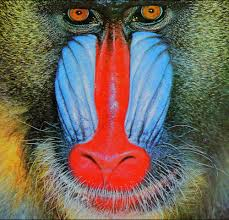

In [5]:
writeImage(babbon)

CHANGE BRIGHTNESS

In [6]:
def changeBrightness(arr,K):
    Karr = arr.astype(np.int16) + K
    Karr[Karr > 255] = 255
    Karr[Karr < 0] = 0
    Karr = Karr.astype(np.uint8)
    return Karr

babbon :


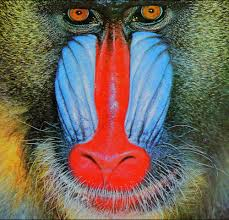

brightBabbon :


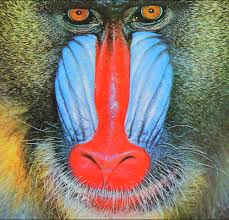

In [7]:
print("babbon :")
writeImage(babbon)
brightBabbon = changeBrightness(babbon, 20)
print("brightBabbon :")
writeImage(brightBabbon)

CHANGE CONTRAST

In [8]:
def changeContrast(arr,contRange):
    contMin, contMax = contRange
    
    contarr = np.zeros(arr.shape)
    for i in range(3):
        normalized_imag = (arr[:, :, i] - arr[:, :, i].min()) / (arr[:, :, i].max() - arr[:, :, i].min())
        contarr[:, :, i] = normalized_imag * (contMax - contMin) + contMin
    
    contarr[contarr > contMax] = contMax
    contarr[contarr < contMin] = contMin
    contarr = np.round(contarr).astype(np.uint8)
    
    return contarr

butterfly :


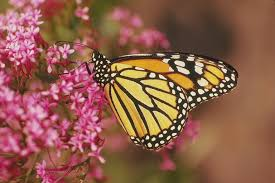

contrastButterfly :


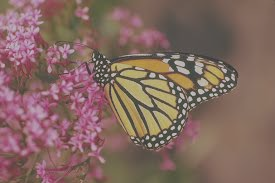

In [9]:
butterfly = readImage("./../media/input/butterfly.jpeg")
print("butterfly :")
writeImage(butterfly)
contrastButterfly = changeContrast(butterfly, [50,200])
print("contrastButterfly :")
writeImage(contrastButterfly)

COLOR TO GREYSCALE

In [10]:
def colorTogreyscale(arr, method='luminosity'):
    if method == 'luminosity':
        colorarr = np.dot(arr, [0.21, 0.72, 0.07])
    elif method == 'average':
        colorarr = np.mean(arr, axis=2)
    elif method == 'desaturation':
        max_rgb = np.max(arr, axis=2)
        min_rgb = np.min(arr, axis=2)
        colorarr = (max_rgb + min_rgb) / 2
    colorarr[colorarr > 255] = 255
    colorarr[colorarr < 0] = 0
    colorarr = colorarr.astype(np.uint8)
    return colorarr

girl :


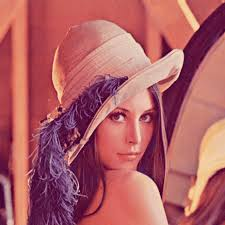

girl in greyscale lumosity method:


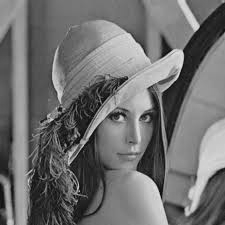

girl in greyscale average method:


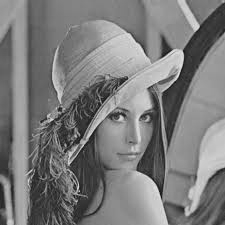

girl in greyscale desaturation method:


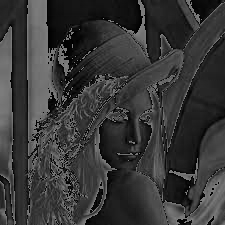

In [11]:
girl = readImage("./../media/input/girl.jpeg")
print("girl :")
writeImage(girl)
greyGirlL = colorTogreyscale(girl, method='luminosity')
print("girl in greyscale lumosity method:")
writeImage(greyGirlL)
greyGirlA = colorTogreyscale(girl, method='average')
print("girl in greyscale average method:")
writeImage(greyGirlA)
greyGirlD = colorTogreyscale(girl, method='desaturation')
print("girl in greyscale desaturation method:")
writeImage(greyGirlD)

Qn: Are there different ways of doing this? What is the visual effect of each?

Methods used above are Luminosity, Average, and Desaturation:

    Luminosity Method: Converts to grayscale using a weighted average of the Red, Green, and Blue (RGB) values (0.21R + 0.72G + 0.07B).
Visual Effect: Produces a more realistic grayscale image by accounting for how the human eye perceives brightness, with green contributing most to the image's brightness.

    Average Method:Simply averages the RGB values (R + G + B) / 3.
Visual Effect: The resulting image can appear flat or dull because it doesn't consider the human perception of different color brightness levels.

    Desaturation Method: Converts to grayscale by averaging the maximum and minimum of the RGB values for each pixel.
Visual Effect: Helps maintain contrast better than the average method but might lose detail in highly saturated areas.

There are also many other methods to convert color images to grayscale, each offering different visual characteristics depending on the intended use.

GREYSCALE TO COLOR

In [12]:
def greyscaleToColor(arr):
    arr = np.float32(arr)
    color_arr = np.zeros((arr.shape[0], arr.shape[1], 3), dtype=np.float32)
    
    ranges = [
        (0, 31, [0, 255, 255], [0, 0, 255]),     # Cyan to Blue
        (32, 63, [0, 0, 255], [255, 0, 255]),    # Blue to Magenta
        (64, 95, [255, 0, 255], [255, 0, 0]),    # Magenta to Red
        (96, 127, [255, 0, 0], [255, 255, 0]),   # Red to Yellow
        (128, 159, [255, 255, 0], [0, 255, 0]),  # Yellow to Green
        (160, 191, [0, 255, 0], [0, 255, 255]),  # Green to Cyan
        (192, 225, [0, 255, 255], [255, 255, 255]), # Cyan to White
    ]
    
    for start, end, start_color, end_color in ranges:
        mask = (arr >= start) & (arr <= end)
        t = (arr[mask] - start) / (end - start)
        for i in range(3):
            color_arr[mask, i] = start_color[i] + t * (end_color[i] - start_color[i])
    
    color_arr[arr < 0] = [0, 0, 0]
    color_arr[arr > 225] = [255, 255, 255]
    
    color_arr = color_arr.astype(np.uint8)
    return color_arr

peppers :


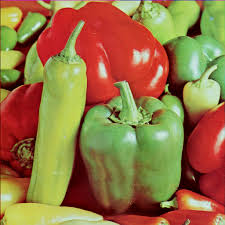

greyPeppers :


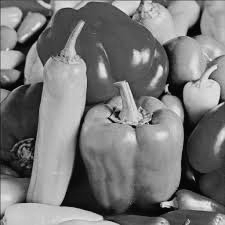

pseudoPeppers :


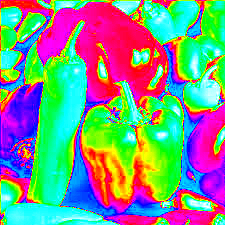

In [13]:
peppers = readImage("./../media/input/pepper.jpeg")
print("peppers :")
writeImage(peppers)
greyPeppers = colorTogreyscale(peppers)
print("greyPeppers :")
writeImage(greyPeppers)
colorPeppers = greyscaleToColor(greyPeppers)
print("pseudoPeppers :")
writeImage(colorPeppers)

GREEN SCREEN

In [14]:
def greenScreen(arr, bg, threshold=200):
    green = arr[:, :, 1]
    mask = green > threshold
    mask = np.stack([mask] * 3, axis=2)
    newarr = np.where(mask, bg, arr)
    return newarr

dog :


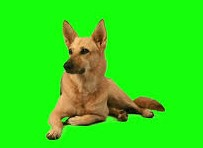

background :


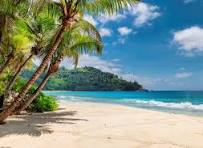

newDog :


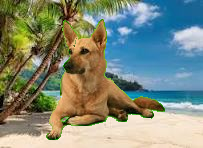

In [15]:
dog = readImage("./../media/input/dog(greenscreen).jpeg")
print("dog :")
writeImage(dog)
bg = readImage("./../media/input/beach(background).jpeg")
print("background :")
writeImage(bg)
newDog = greenScreen(dog, bg)
print("newDog :")
writeImage(newDog)

READ VIDEO AND WRITE VIDEO

In [16]:
import cv2

In [17]:
def readVideo(file_path):
    frames = []
    cap = cv2.VideoCapture(file_path)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    
    cap.release()
    return frames

In [18]:
def writeVideo(frames, output_path, fps=30):
    height, width, _ = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for frame in frames:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        video_writer.write(frame_rgb)

    video_writer.release()
    print(f"Video saved to {output_path}")


In [19]:
frames = readVideo('./../media/input/sampleVideo.mp4')

In [20]:
writeVideo(frames, "./../media/output/sampleVideo.mp4", fps=30)

Video saved to ./../media/output/sampleVideo.mp4


VIDEO TRANSITION

In [21]:
def transitionVideo(image1, image2, transition_type='fade', duration=1, fps=30):
    frames = []
    alpha = np.linspace(0, 1, duration * fps)
    w = image2.shape[1]

    if transition_type == 'fade':
        for a in alpha:
            newFrame = (1 - a) * image1 + a * image2
            newFrame[newFrame > 255] = 255
            newFrame[newFrame < 0] = 0
            newFrame = newFrame.astype(np.uint8)
            frames.append(newFrame)
            
    elif transition_type == 'slide':
        w = image1.shape[1]
        for j in range(duration * fps):
            newFrame = np.zeros_like(image1)
            shift = int(j / (duration * fps) * w)
            newFrame[:, :shift] = image2[:, :shift]
            newFrame[:, shift:] = image1[:, shift:]
            frames.append(newFrame)

    return frames


image1 :


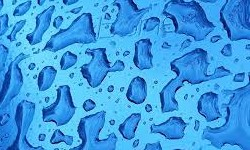

image2 :


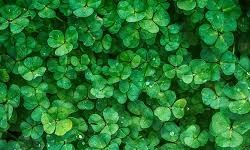

In [22]:
tranImage1 = readImage("./../media/input/transition(blue).jpeg")
print("image1 :")
writeImage(tranImage1)
tranImage2 = readImage("./../media/input/transition(green).jpeg")
print("image2 :")
writeImage(tranImage2)

In [23]:
fade = transitionVideo(tranImage1, tranImage2, transition_type='fade', duration=1, fps=30)
writeVideo(fade, "./../media/output/fadeTransition.mp4", fps=30)

Video saved to ./../media/output/fadeTransition.mp4


In [24]:
slide = transitionVideo(tranImage1, tranImage2, transition_type='slide', duration=1, fps=30)
writeVideo(slide, "./../media/output/slideTransition.mp4", fps=30)

Video saved to ./../media/output/slideTransition.mp4
